In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from PIL import Image
from natsort import natsorted
import os

Loading datasets and performing EDA.

In [87]:
df_pressure = pd.read_excel('Pressure.xlsx')

df_withings = pd.read_csv('WIthings_Data.csv')

In [88]:
df_pressure.head()

id                date   timestamp  session  Unnamed: 4  \
0  id_53341667482178 2022-11-03 15:29:37  1667482178   110322         286   
1  id_53371667482314 2022-11-03 15:31:53  1667482314   110322         304   
2  id_53401667482449 2022-11-03 15:34:09  1667482449   110322         290   
3  id_53431667482585 2022-11-03 15:36:25  1667482585   110322          65   
4  id_53461667482721 2022-11-03 15:38:40  1667482721   110322         271   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0        64.0         2.0       151.0       143.0         0.0  ...   
1        77.0        24.0       170.0       164.0         0.0  ...   
2         0.0        46.0         0.0       130.0         0.0  ...   
3         0.0        32.0         0.0       174.0         0.0  ...   
4         0.0       209.0        10.0       122.0       210.0  ...   

   Unnamed: 122  Unnamed: 123  Unnamed: 124  Unnamed: 125  Unnamed: 126  \
0         491.0         233.0         293.0         285.0         381.0   
1         506.0         219.0         320.0         297.0         396.0   
2           0.0         139.0           0.0           0.0           0.0   
3           0.0         191.0           0.0           0.0           0.0   
4         157.0         113.0           0.0           0.0           0.0   

   Unnamed: 127  Unnamed: 128  Unnamed: 129  Unnamed: 130  Unnamed: 131  
0         192.0         314.0         733.0          17.0           0.0  
1         217.0         299.0         762.0          39.0           0.0  
2           0.0           0.0           0.0           0.0           0.0  
3           0.0           0.0          21.0           0.0           0.0  
4           0.0           0.0           0.0           0.0           0.0  

[5 rows x 132 columns]

In [89]:
df_pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6708 entries, 0 to 6707
Columns: 132 entries, id to Unnamed: 131
dtypes: datetime64[ns](1), float64(127), int64(3), object(1)
memory usage: 6.8+ MB


In [90]:
df_pressure.session.unique()

array([110322, 110422, 110522, 110622, 110722, 110822, 110922, 111022,
       111122, 111222, 111822, 112122, 112222, 112622, 112822, 112922,
       120722, 120822,  12023,  12123,  30323,  30423,  30923,  31023,
        50923,  51023,  51623,  51723,  51823], dtype=int64)

In [91]:
df_pressure.session.dtype

dtype('int64')

In [92]:
# df_pressure['timestamp'] = df_pressure.timestamp.astype('int64').apply(lambda x: datetime.datetime.fromtimestamp(x))

# remove comment if needed 

In [93]:
df_pressure.id.duplicated().sum()

0

Saving the images of the pressure data for session '110322'.

In [94]:
for idx, row in df_pressure[df_pressure.session == 110322].iterrows():
    arr = df_pressure.iloc[idx][4:].values.reshape(16,8).astype(float)
    plt.imsave('./images/arr'+str(idx)+'.png', arr=arr[::-1])


Creating a gif out of them to show pressure progression.

In [99]:
def resize_images(image_paths, width, height):
    resized_images = []
    for image_path in image_paths:
        image = Image.open(image_path)
        resized_image = image.resize((width, height), Image.LANCZOS)
        resized_images.append(resized_image)
    return resized_images

def create_gif(image_paths, gif_path, width, height, duration=100, loop=0):
    resized_images = resize_images(image_paths, width, height)
    resized_images[0].save(
        gif_path,
        save_all=True,
        append_images=resized_images[1:],
        optimize=False,
        duration=duration,
        loop=loop
    )

image_paths = natsorted(['./images/'+str(image) for image in os.listdir('./images')])
gif_path = '110322_gif.gif'
width = 300  
height = 500  

create_gif(image_paths, gif_path, width, height, duration=200, loop=0)


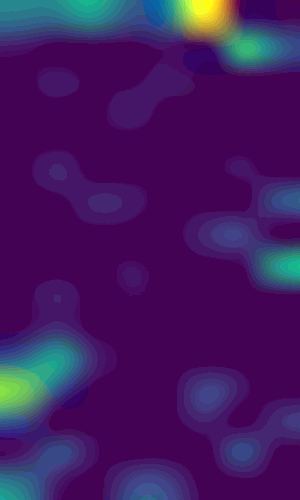

In [101]:
from IPython.display import display, Image

display(Image(filename='110322_gif.gif'))


Exploring the WIthings dataset.

In [ ]:
df_withings.head()

id       timezone  model  model_id  \
0  2528092591  Europe/Athens     32        63   
1  2533649747  Europe/Athens     32        63   
2  2590838686  Europe/Athens     32        63   
3  2590838702  Europe/Athens     32        63   
4  2590838725  Europe/Athens     32        63   

                              hash_deviceid   startdate     enddate  \
0  68adfb6ee779119c85aa4a5197d6bc82095d6ab9  1642192080  1642221780   
1  68adfb6ee779119c85aa4a5197d6bc82095d6ab9  1642450140  1642479000   
2  68adfb6ee779119c85aa4a5197d6bc82095d6ab9  1644608520  1644657060   
3  68adfb6ee779119c85aa4a5197d6bc82095d6ab9  1644870000  1644898560   
4  68adfb6ee779119c85aa4a5197d6bc82095d6ab9  1644955140  1644986640   

        date  data/wakeupduration  data/wakeupcount  ...  data/rr_min  \
0  1/15/2022                 5220                 3  ...            9   
1  1/18/2022                 6480                 6  ...           10   
2  2/12/2022                 4800                 5  ...           10   
3  2/15/2022                 3780                 1  ...            9   
4  2/16/2022                 5220                 1  ...            9   

   data/rr_max  data/breathing_disturbances_intensity  data/snoring  \
0           20                                     20          1320   
1           17                                     19          1980   
2           23                                     76          9960   
3           18                                      6          7740   
4           23                                      0             0   

   data/snoringepisodecount  data/sleep_score  data/apnea_hypopnea_index  \
0                         4                64                      10.00   
1                         6                52                       9.56   
2                        17                76                      38.11   
3                        12                78                       3.22   
4                         0                74                       0.00   

      created    modified  data/night_events  
0  1642223557  1642479997                NaN  
1  1642479998  1642842171                NaN  
2  1645195477  1645195477                NaN  
3  1645195478  1645195478                NaN  
4  1645195479  1645195478                NaN  

[5 rows x 37 columns]